In [2]:
import pandas as pd
import matplotlib
import mysql.connector as mysql
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import koreanize_matplotlib

In [3]:
remote = mysql.connect (
    host = "database-1.c9ks828mszs7.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "roschool",
    password = "1234",
    database = "roschool"
)

In [35]:
cursor = remote.cursor(buffered=True)

cursor.execute("""
            SELECT a.tech_name, a.count
FROM (
    SELECT tech_name, COUNT(tech_name) as count
    FROM recruit_info re, prefer_tech pr, tech_info te
    WHERE (re.recruit_id = pr.recruit_id) AND (te.tech_id = pr.tech_id) AND tech_name != "정보없음"
    GROUP BY tech_name
    HAVING count > 5
) a
INNER JOIN (
    SELECT tech_name, COUNT(tech_name) as count
    FROM recruit_info re, tech_info te, essential_tech es
    WHERE (re.recruit_id = es.recruit_id) AND (te.tech_id = es.tech_id) AND tech_name != "정보없음" AND tech_name != "R&D" AND tech_name != "C#"
    GROUP BY tech_name
    HAVING count > 5
) b
ON a.tech_name = b.tech_name;

""")

result = cursor.fetchall()

df = pd.DataFrame(result)

df.head()

,0,1
0,C++,20
1,Python,13
2,SLAM,15
3,C,7
4,Linux,29


In [41]:
cursor = remote.cursor(buffered=True)

cursor.execute("""select i.tech_name, i.co+j.co sum from (select tech_name, count(tech_name) co from tech_info te, essential_tech es 
               where te.tech_id = es.tech_id 
               group by tech_name) i,
               (select tech_name, count(tech_name) co from tech_info te, prefer_tech pr 
               where te.tech_id = pr.tech_id 
               group by tech_name) j
               where i.tech_name = j.tech_name
               
""")
result = cursor.fetchall()
df = pd.DataFrame(result)

df

,0,1
0,.NET,5
1,AGV,7
2,ARM,6
3,Arduino,3
4,Asana,4
5,C,74
6,C#,49
7,C++,137
8,CUDA,3
9,Docker,20


In [42]:
df.columns = ["기술", "수"]

In [53]:
df = df[df['수'] > 15].sort_values(by="수", ascending=False)

df


,기술,수
7,C++,137
22,ROS,89
21,Python,80
5,C,74
15,Linux,71
6,C#,49
11,Git,39
10,Embedded,36
25,SLAM,26
9,Docker,20


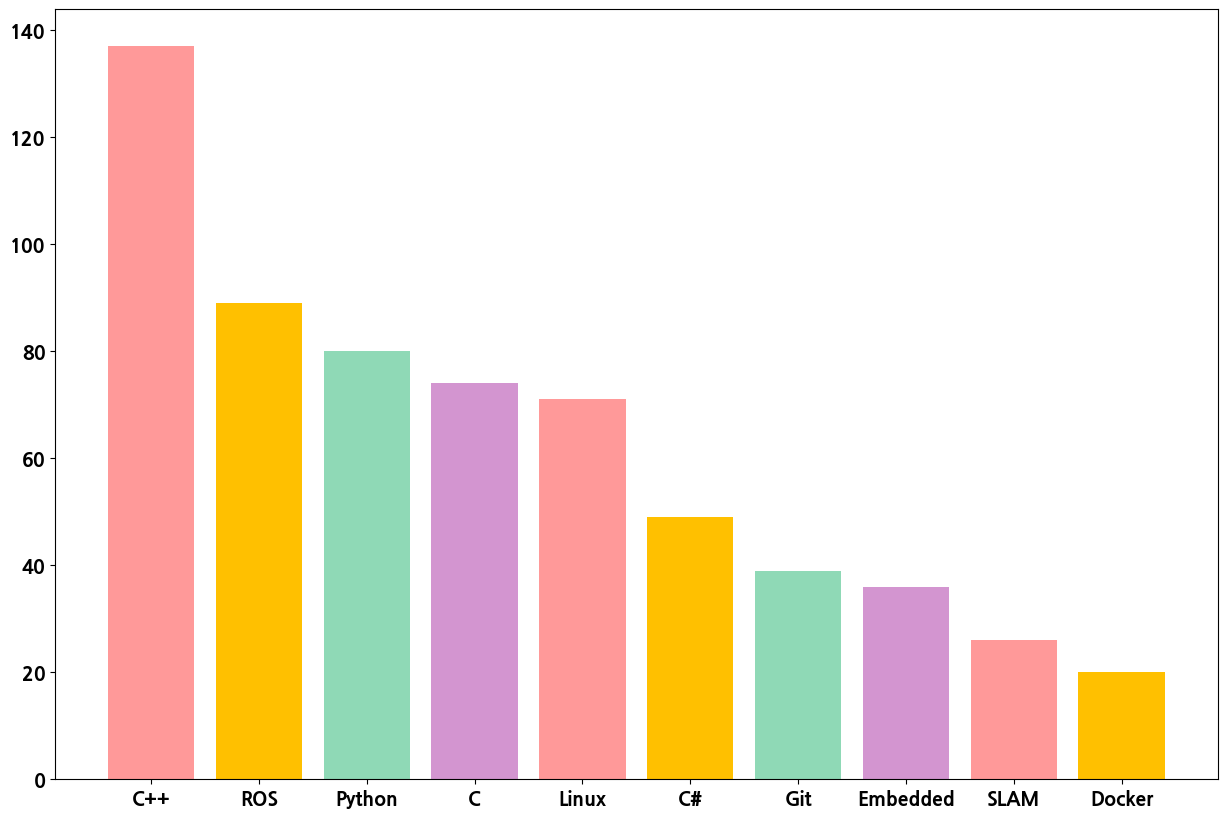

In [54]:
import matplotlib.pyplot as plt

# 한글 폰트 설정 (필요시 주석 해제)
# from matplotlib import rc
# rc('font', family='Malgun Gothic')  # 한글 폰트 설정 (Windows: 맑은 고딕)

# 색상 설정
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']

# 막대 그래프 생성
plt.figure(figsize=(15, 10))
plt.bar(df["기술"], df["수"], color=colors[:len(df)])

# 폰트 크기와 굵기 설정
plt.xticks(fontsize=14, fontweight='bold')  # x축 눈금
plt.yticks(fontsize=14, fontweight='bold')  # y축 눈금
# plt.xlabel("기술 스택", fontsize=16, fontweight='bold')  # x축 라벨
# plt.ylabel("수", fontsize=16, fontweight='bold')  # y축 라벨
# plt.title("기술 스택 별 수량 분포", fontsize=18, fontweight='bold')  # 제목

# 그래프 표시
plt.show()
